# 単始点最短路問題とダイクストラ（Dijkstra）法

単始点最短路問題とダイクストラ法（Dijkstra）を紹介する．

単始点最短路問題の入力と出力は

- 入力: 連結単純有向グラフ$G$，枝長さ$l \colon E(G) \to \mathbb{R}_{\ge 0}$，始点$s \in V(G)$
- 出力: 始点$s$からの最短路長$d \colon V(G) \to \mathbb{R}_{\ge 0}$

である．

ここでは簡単のため，最短路長だけを出力し，最短路は出力しないものとする．

例えば，以下の連結単純有向グラフ

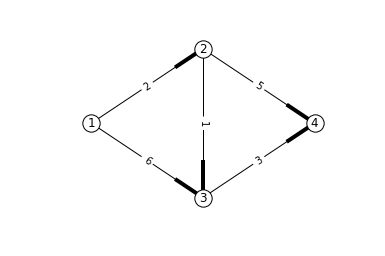

In [1]:
# このコードは描画用である．

import networkx as nx
import matplotlib.pyplot as plt

N4 = nx.DiGraph()
N4.add_node(1, position=(0, 0))
N4.add_node(2, position=(1, 1))
N4.add_node(3, position=(1, -1))
N4.add_node(4, position=(2, 0))
N4.add_edge(1, 2, length=2)
N4.add_edge(1, 3, length=6)
N4.add_edge(2, 3, length=1)
N4.add_edge(2, 4, length=5)
N4.add_edge(3, 4, length=3)
posN4 = nx.get_node_attributes(N4, 'position')

%matplotlib inline
fig, ax = plt.subplots()
ax.set_axis_off()
nx.draw_networkx(N4, pos=posN4, with_labels=True, node_color='w')
edge_label = nx.draw_networkx_edge_labels(N4, pos=posN4, edge_labels=nx.get_edge_attributes(N4, 'length'))

が入力として与えられ，始点は頂点①であるとする．

このとき出力は

- d(①) = 0,
- d(②) = 2,
- d(③) = 3,
- d(④) = 6,

である．

最短路を図示すると以下の赤い有向グラフ

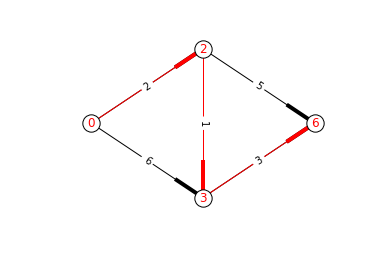

In [2]:
# このコードは描画用である．

shortest_distance_of_N4 = nx.single_source_dijkstra_path_length(N4, 1, weight='length')

def draw_shortest_paths(G, d, node_label=False, edge_label=False, edge_arrows=True, node_size=300):
    p = nx.get_node_attributes(G, 'position')
    nx.draw_networkx(G, pos=p, arrows=edge_arrows, with_labels=False, node_color='w', node_size=node_size)
    edge_list = {}
    for n in d:
        dist = d[n]
        for pred in G.predecessors_iter(n):
            if dist - G.edge[pred][n]['length'] == d[pred]:
                edge_list[(pred, n)] = True
    nx.draw_networkx_edges(G, pos=p, edgelist=edge_list.keys(), edge_color='r')
    if edge_label:
        nx.draw_networkx_edge_labels(G, pos=p, edge_labels=nx.get_edge_attributes(G, 'length'))
    if node_label:
        nx.draw_networkx_labels(G, pos=p, labels=d, font_color='r')
    return

%matplotlib inline
fig, ax = plt.subplots()
ax.set_axis_off()
draw_shortest_paths(N4, shortest_distance_of_N4, node_label=True, edge_label=True)

となる．
ここで頂点の赤い数字は，頂点の名前ではなく，頂点への最短路長である．

## ダイクストラ法

枝長さが非負の単始点最短路問題を効率的に解く方法として，ダイクストラ法が知られている．
ここでは，ダイクストラ法のコード例を示す．

まず，ダイクストラ法を記述する前に，枝長さ付きの有向グラフを辞書を用いて保存する．

例えば，前出の有向グラフ（と枝長さ）ならば，以下の辞書

In [3]:
V = ['1', '2', '3', '4'] # 有向グラフの頂点集合をVとする．

E = [('1', '2'), ('1', '3'), ('2', '3'), ('2', '4'), ('3', '4')] # 有向グラフの枝集合をEとする．

length = { # それぞれの枝の長さも辞書で保存する．  
    ('1', '2'): 2, # ①から②への有向枝の長さは2である．
    ('1', '3'): 6,
    ('2', '3'): 1,
    ('2', '4'): 5,
    ('3', '4'): 3,
}

ダイクストラ法を以下に関数dijkstraとして定義する．

In [4]:
def dijkstra(V, # 有向グラフの頂点集合
             E, # 有向枝集合
             length, # 枝長さ
             source, # 始点
            ):
    '''
    ネットワーク上の単始点最短路問題を動的計画法（Dijkstra法）で解く関数である．
    説明のスライドをそのままPythonでコーディングしただけである．
    ただし，このコーディングはわかりやすさ再優先なので，特にStep 4-1の計算の効率は悪い．
    '''
    
    '''
    前準備として，頂点が与えられたらその頂点から出ている枝の先の頂点のリストを引ける辞書successorを作る．
    '''
    successor = {v: [] for v in V}
    for tail, head in E:
        successor[tail] += head

    '''
    スライドのStep 1に該当する．
    '''
    distance = {} # 最短路長distanceは辞書で出力することにする．
    upper_bound_of_shortest_path_length = sum(length.values())
    # スライドの∞の代わりに，最短路長の自明な上界として「枝長さの合計」を使うことにする．
    for v in V:
        distance[v] = upper_bound_of_shortest_path_length

    '''
    スライドのStep 2に該当する．
    '''
    distance[source] = 0 # 始点そのものへの最短路長は0である．

    '''
    スライドのStep 3に該当する．
    '''
    U = V[:] # 集合（リスト）Uに頂点集合をコピーする．

    '''
    スライドのStep 4に該当する．
    '''
    while len(U) > 0:
        '''
        スライドのStep 4-1に該当する．
        '''
        minimum_of_d = upper_bound_of_shortest_path_length
        v = U[0]
        for u in U:
            if distance[u] < minimum_of_d:
                v = u
                minimum_of_d = distance[v]
        '''
        スライドのStep 4-2に該当する．
        '''
        U.remove(v)
        '''
        スライドのStep 4-3に該当する．
        '''
        for w in successor[v]:
            if distance[w] > distance[v] + length[(v, w)]:
                distance[w] = distance[v] + length[(v, w)]

    '''
    スライドのStep 5に該当する．
    '''
    return distance

In [5]:
shortest_distance = dijkstra(V, E, length, '1') # 始点を①として最短路長をダイクストラ法で求める．

In [6]:
shortest_distance

{'1': 0, '2': 2, '3': 3, '4': 6}

最短路長がわかっているならば，最短経路，より正確には最短路を構成する枝を見つけるのも容易である．

In [7]:
def shortest_path_edges(V, E, length, source, distance):
    '''
    前準備として，頂点が与えられたらその頂点に入ってくる枝の元の頂点のリストを引ける辞書predecessorを作る．
    '''
    predecessor = {v: [] for v in V}
    for tail, head in E:
        predecessor[head] += [tail]
    
    '''
    distance(pred) + length[(pred, v)] = distance(v)
    となっている頂点対(pred, v)があったら，
    それは最短路で使われているはずである．
    '''
    edges = [] # 最短路で使われている枝を保存するリスト
    for v in V: # それぞれの頂点に関して以下を行う．
        if v == source: # vが始点ならば
            continue # なにもしない．
        for pred in predecessor[v]: # vに入ってくる枝（の元）それぞれに関して，
            if length[(pred, v)] == distance[v] - distance[pred]:
                # もしも最適性条件を満たしているならば，
                edges += [(pred, v)] # それは最短路で使われているはずである．
                break
    return edges

In [8]:
shortest_path_edges(V, E, length, '1', shortest_distance)

[('1', '2'), ('2', '3'), ('3', '4')]

## Networkxの利用

単始点最短路問題を含む，グラフ上の最適化問題は多くの場面で有用である．
よって，グラフを入力とするアルゴリズムを実装したパッケージが広く流通している．

ここでは，そのようなパッケージの1つである[networkx](http://networkx.github.io/)を利用してみる．
（すでに上記の描画で利用しているが．）

In [9]:
import networkx as nx # モジュールnetworkxをnxという略称でimportする．

In [10]:
G = nx.DiGraph() # これでGという名前の（中身は何もない）有向グラフが作られる．

In [11]:
G.add_edge('1', '2', edge_length=2) 
# これで有向グラフGに「'1'から'2'への有向枝」が「edge_lengthという属性の値が2」というおまけ付きで加えられる．

In [12]:
G.add_edge('1', '3', edge_length=6) 
G.add_edge('2', '3', edge_length=1) 
G.add_edge('2', '4', edge_length=5)
G.add_edge('3', '4', edge_length=3)

In [13]:
nx.single_source_dijkstra_path_length(G, '1', weight='edge_length')
# networkxのメソッドsingle_source_dijkstra_path_lengthは，「グラフG，始点'1'，長さの属性edge_length」を引数として，最短路長を返す．

{'1': 0, '2': 2, '3': 3, '4': 6}

## 計算時間の比較

あまりおもしろい例ではないが，以下のようなグリッドグラフに枝重みをランダムに設定し，ダイクストラ法の計算時間を測ってみる．

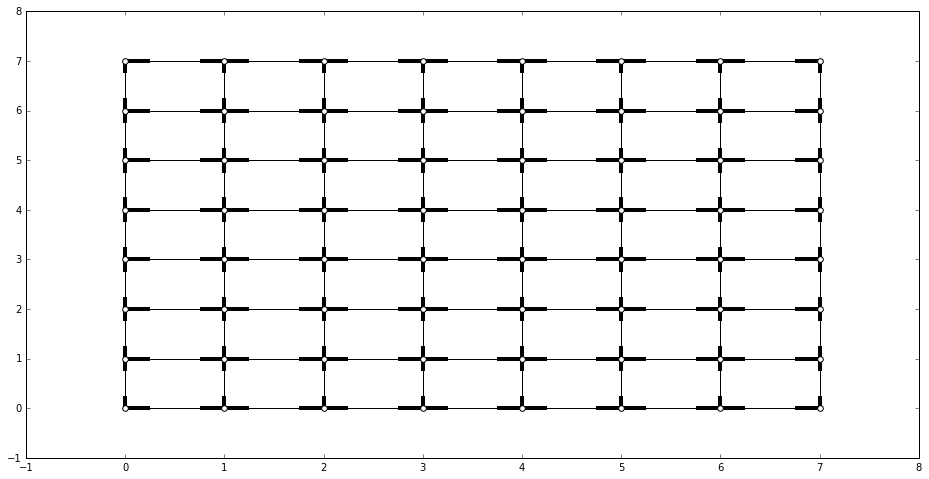

In [14]:
m = 2 ** 3 
n = 2 ** 3
gmn = nx.grid_2d_graph(m, n).to_directed()
for i in range(m):
    for j in range(n):
        gmn.node[(i, j)]['position'] = (i, j)
import random
for tail, head in gmn.edges():
    gmn.edge[tail][head]['length'] = random.randint(0, 100)
    
%matplotlib inline
plt.figure(figsize=(16, 8))
nx.draw_networkx(gmn, pos=nx.get_node_attributes(gmn,'position'), arrows=True, with_labels=False, node_size=32,
                 node_color='w', alpha=1)

枝長さの表示は省略する．

まず，networkxのDiGraph形式のデータを読み込んで，ダイクストラ法を実行する関数を再度定義して実行してみる．

In [15]:
def argmin(U, d):
    minimum_node = U[0]
    minimum_distance = d[minimum_node]
    for n in U:
        if d[n] < minimum_distance:
            minimum_distance = d[n]
            minimum_node = n
    return minimum_node

def dijkstra(G, s):
    edge_length_sum = sum(nx.get_edge_attributes(G, 'length').values())
    d = {}
    for n in G.nodes():
        d[n] = edge_length_sum # ∞の代わりに枝長さの合計を代入
    d[s] = 0
    U = G.nodes()
    while len(U) > 0:
        v = argmin(U, d)
        U.remove(v)
        for w in G.successors_iter(v):
            if d[w] > d[v] + G.edge[v][w]['length']:
                d[w] = d[v] + G.edge[v][w]['length']
    return d

In [16]:
%%time

shortest_distance_of_gmn = dijkstra(gmn, (0, 0))

CPU times: user 719 µs, sys: 13 µs, total: 732 µs
Wall time: 725 µs


次にnetworkxのメソッドで実行時間を測ってみる．

In [17]:
%%time

shortest_distance_of_gmn = nx.single_source_dijkstra_path_length(gmn, (0, 0))

CPU times: user 258 µs, sys: 0 ns, total: 258 µs
Wall time: 260 µs


Networkxのメソッドの方が早いが，このくらいならば大差ないと思える．

次に，グラフの大きさ（頂点数と枝数）を変えて，計算時間をプロットしてみる．

In [18]:
import time
import numpy as np

def dijkstra_time(max_size=10):
    log = []
    for m in range(2, max_size + 1):
        n = m
        gmn = nx.grid_2d_graph(m, n).to_directed()
        for i in range(m):
            for j in range(n):
                gmn.node[(i, j)]['position'] = (i, j)
        for tail, head in gmn.edges():
            gmn.edge[tail][head]['length'] = random.randint(0, 100)
            
        size = len(gmn.nodes())
        
        start_time = time.time()
        dgmn = dijkstra(gmn, (0, 0))
        simple_dijkstra_time = time.time() - start_time
        
        start_time = time.time()
        dgmn = nx.single_source_dijkstra_path_length(gmn, (0, 0))
        nx_dijkstra_time = time.time() - start_time
        
        log.append((size, simple_dijkstra_time, nx_dijkstra_time))
    return log

In [19]:
log = np.array(dijkstra_time(100))

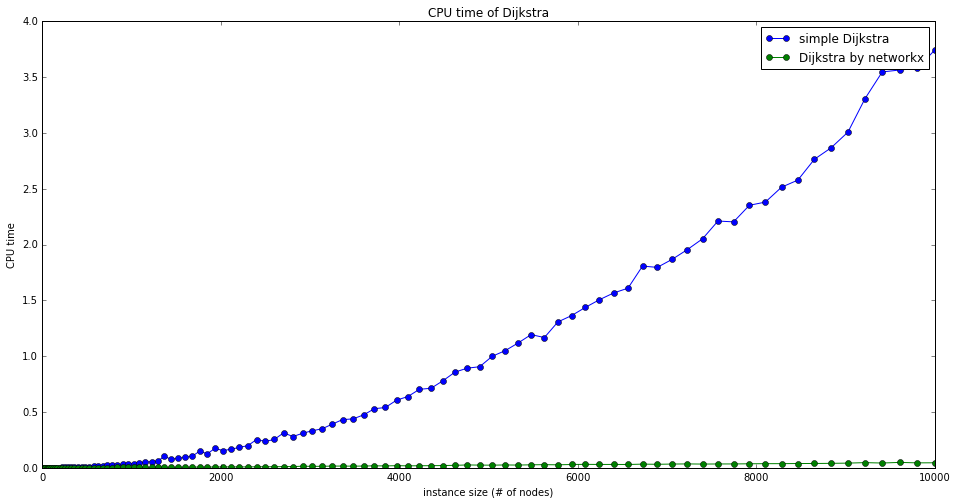

In [20]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.title('CPU time of Dijkstra')
plt.xlabel('instance size (# of nodes)')
plt.ylabel('CPU time')
plt.yscale('linear')
plt.plot(log[:,0], log[:,1], 'o-', label='simple Dijkstra')
plt.plot(log[:,0], log[:,2], 'o-', label='Dijkstra by networkx')
z = plt.legend()

先程適当にコーディングしたdijkstraはわかりやすさのため，データ構造の工夫は施していない．
一方で，networkxのメソッドには（おそらく）データ構造の工夫も施されている．
これが計算時間の違いに現れている．

データ構造の工夫のないコードは，枝数とは関係なく，頂点数の2乗に比例して計算時間がかかる．
データ構造の工夫を施すと（ものすごく大雑把に言うと）「頂点数と枝数にほぼ比例」した計算時間で済む．